In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

Data Analysis

In [6]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Plot a pie chart 

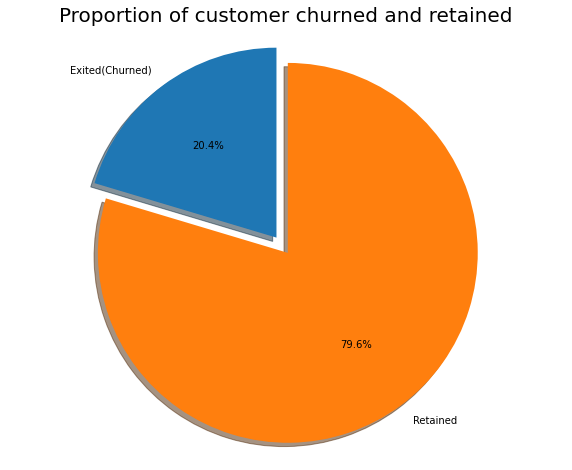

In [7]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

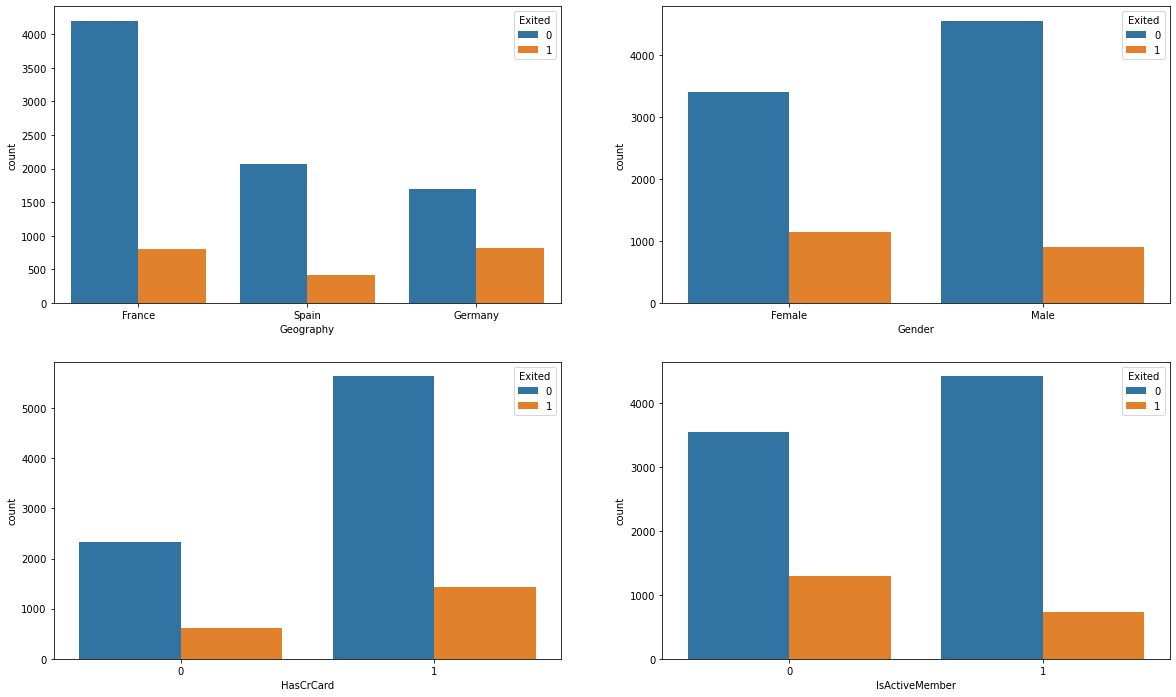

In [8]:
import seaborn as sns
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

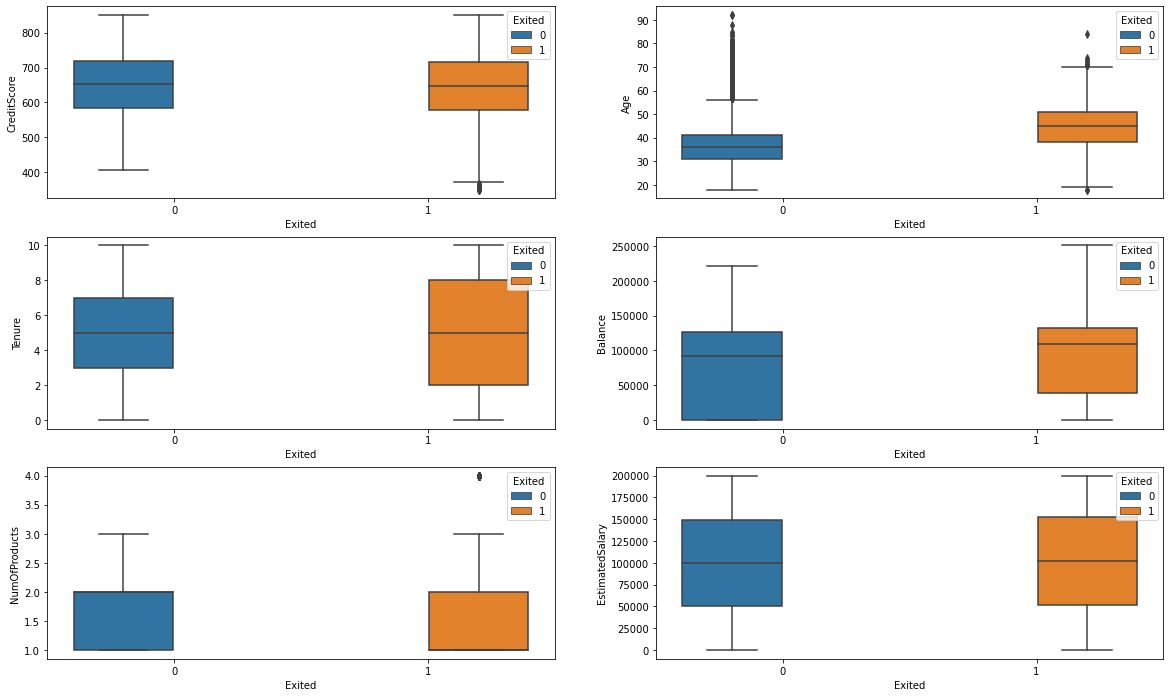

In [10]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

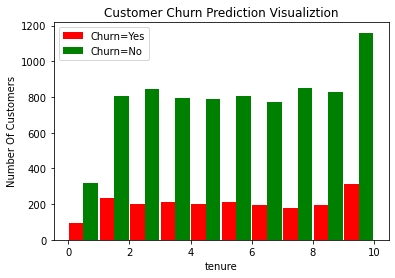

In [11]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Feature engineering

(-1.0, 5.0)

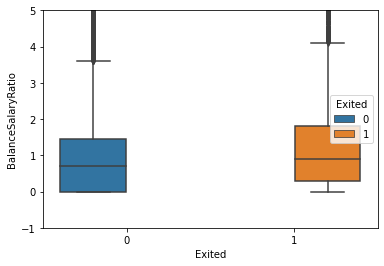

In [12]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

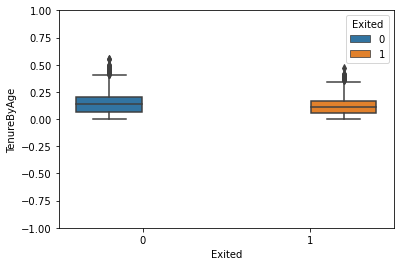

In [13]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


LABEL ENCODING

In [16]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

One hot encoding

In [17]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [18]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [19]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [20]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [21]:
len(X_train.columns)

14

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5927 - accuracy: 0.7640
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.7896
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.8152
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.8167
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8190
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.8090
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.8238
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.8284
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3944 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8711
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.8736
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8723
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3141 - accuracy: 0.8710
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3139 - accuracy: 0.8716
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.8734
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8754
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3122 - accuracy: 0.8731
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.8744
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 

In [39]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 4s 1ms/step - loss: 0.3623 - accuracy: 0.8515


[0.36228570342063904, 0.8514999747276306]

In [40]:
pred=model.predict(X_test)
pred

63/63 [==============================] - 0s 966us/step


array([[0.0245308 ],
       [0.03881396],
       [0.02656837],
       ...,
       [0.01729369],
       [0.03116886],
       [0.01757877]], dtype=float32)

In [42]:
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.42      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

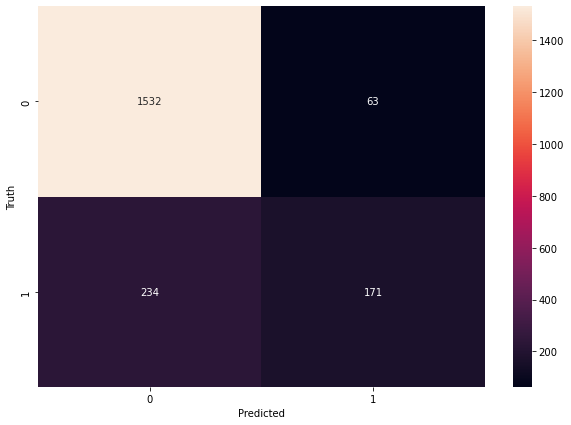

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.15 %


Using AutoML

In [47]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [48]:
!pip install h2o

     -------------------------------------- 177.0/177.0 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=7430200fa069299d1b79f6f267c0b39bc61193af0b8e4c61448640f30c20595d
  Stored in directory: c:\users\yash oza\appdata\local\pip\cache\wheels\f0\bd\e4\77dade0bd453ff51a196e29837fa5cc30b9df0aa8f5fd36bf6
Successfully built h2o


In [49]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM AdoptOpenJDK (build 11.0.9.1+1, mixed mode)
  Starting server from C:\Users\Yash Oza\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\YASHOZ~1\AppData\Local\Temp\tmpwn4h0vpu
  JVM stdout: C:\Users\YASHOZ~1\AppData\Local\Temp\tmpwn4h0vpu\h2o_Yash_Oza_started_from_python.out
  JVM stderr: C:\Users\YASHOZ~1\AppData\Local\Temp\tmpwn4h0vpu\h2o_Yash_Oza_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,12 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_Yash_Oza_iu4rcw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [51]:
df = h2o.import_file("Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [52]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [53]:
df_train,df_test= df.split_frame(ratios=[.8])

In [54]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
12,1.57372e+07,Andrews,497,Spain,Male,24,3,0,2,1,0,76390,0
13,1.56323e+07,Kay,476,France,Female,34,10,0,2,1,0,26261,0


In [55]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [56]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [57]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
22:05:41.347: Project: AutoML_1_20220712_220541
22:05:41.352: Setting stopping tolerance adaptively based on the training frame: 0.011168479675238057
22:05:41.352: Build control seed: 10
22:05:41.354: training frame: Frame key: AutoML_1_20220712_220541_training_py_3_sid_b9b6    cols: 14    rows: 8017  chunks: 32    size: 508464  checksum: 8975300304145251672
22:05:41.355: validation frame: NULL
22:05:41.355: leaderboard frame: NULL
22:05:41.355: blending frame: NULL
22:05:41.355: response column: Exited
22:05:41.355: fold column: null
22:05:41.356: weights column: null
22:05:41.383: AutoML: XGBoost is not available; skipping it.
22:05:41.395: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207714,0.002501,0.209482,0.205945
1,mean_residual_deviance,0.101037,0.004507,0.104224,0.097850
2,mse,0.101037,0.004507,0.104224,0.097850
3,null_deviance,644.547240,6.889663,639.675500,649.418950
4,r2,0.371722,0.024440,0.354440,0.389004
5,residual_deviance,404.858730,11.423878,412.936650,396.780850
6,rmse,0.317824,0.007091,0.322838,0.312810
7,rmsle,0.223264,0.004640,0.226545,0.219983


In [58]:
lb = aml.leaderboard

In [59]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220712_220541,0.317817,0.101008,0.20731,0.22332,0.101008
StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_220541,0.318266,0.101293,0.207689,0.223611,0.101293
GBM_5_AutoML_1_20220712_220541,0.319287,0.101944,0.209167,0.224181,0.101944
GBM_2_AutoML_1_20220712_220541,0.32093,0.102996,0.210609,0.225306,0.102996
GBM_1_AutoML_1_20220712_220541,0.321343,0.103262,0.214306,0.226264,0.103262
GBM_3_AutoML_1_20220712_220541,0.321803,0.103557,0.211107,0.226116,0.103557
GBM_4_AutoML_1_20220712_220541,0.324391,0.10523,0.210993,0.228512,0.10523
GBM_grid_1_AutoML_1_20220712_220541_model_1,0.32507,0.10567,0.226668,0.228553,0.10567
DRF_1_AutoML_1_20220712_220541,0.326924,0.106879,0.214844,0.230814,0.106879
DeepLearning_1_AutoML_1_20220712_220541,0.3325,0.110557,0.234567,0.236941,0.110557


In [60]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [61]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20220712_220541',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_220541',
 'GBM_5_AutoML_1_20220712_220541',
 'GBM_2_AutoML_1_20220712_220541',
 'GBM_1_AutoML_1_20220712_220541',
 'GBM_3_AutoML_1_20220712_220541',
 'GBM_4_AutoML_1_20220712_220541',
 'GBM_grid_1_AutoML_1_20220712_220541_model_1',
 'DRF_1_AutoML_1_20220712_220541',
 'DeepLearning_1_AutoML_1_20220712_220541',
 'XRT_1_AutoML_1_20220712_220541',
 'GLM_1_AutoML_1_20220712_220541']

In [62]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1077102335684134
RMSE: 0.3281923728065803
MAE: 0.2115078763794483
RMSLE: 0.2294500867546585
R^2: 0.3581442585795861
Mean Residual Deviance: 0.1077102335684134
Null degrees of freedom: 1982
Residual degrees of freedom: 1974
Null deviance: 333.05365500519224
Residual deviance: 213.58939316616377
AIC: 1228.7701439948987


In [63]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220712_220541

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07843448297489267
RMSE: 0.2800615699714844
MAE: 0.1768873811657073
RMSLE: 0.1949102914196811
R^2: 0.5121977792968522
Mean Residual Deviance: 0.07843448297489267
Null degrees of freedom: 8016
Residual degrees of freedom: 8008
Null deviance: 1289.0659847823322
Residual deviance: 628.8092500097146
AIC: 2364.0541682706175

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10100758193849864
RMSE: 0.31781690002027685
MAE: 0.20731020499325284
RMSLE: 0.22331962432505187
R^2: 0.37181044728468504
Mean Residual Deviance: 0.10100758193849864
Null degrees of freedom: 8016
Residual degrees of freedom: 8008
Null deviance: 1289.0944670048025
Residual deviance: 809.7777844009436
AIC: 4391.809356484217

Cross-Validation Metr

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207714,0.002501,0.209482,0.205945
1,mean_residual_deviance,0.101037,0.004507,0.104224,0.097850
2,mse,0.101037,0.004507,0.104224,0.097850
3,null_deviance,644.547240,6.889663,639.675500,649.418950
4,r2,0.371722,0.024440,0.354440,0.389004
5,residual_deviance,404.858730,11.423878,412.936650,396.780850
6,rmse,0.317824,0.007091,0.322838,0.312810
7,rmsle,0.223264,0.004640,0.226545,0.219983


In [64]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20220712_220541',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20220712_220541'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20220712_220541_training_py_3_sid_b9b6',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20220712_220541_training_py_3_sid_b9b6'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20220712_220541_training_py_3_sid_b9b6',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20220712_220541_training_py_3_sid_b9b6'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [65]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220712_220541

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07843448297489267
RMSE: 0.2800615699714844
MAE: 0.1768873811657073
RMSLE: 0.1949102914196811
R^2: 0.5121977792968522
Mean Residual Deviance: 0.07843448297489267
Null degrees of freedom: 8016
Residual degrees of freedom: 8008
Null deviance: 1289.0659847823322
Residual deviance: 628.8092500097146
AIC: 2364.0541682706175

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10100758193849864
RMSE: 0.31781690002027685
MAE: 0.20731020499325284
RMSLE: 0.22331962432505187
R^2: 0.37181044728468504
Mean Residual Deviance: 0.10100758193849864
Null degrees of freedom: 8016
Residual degrees of freedom: 8008
Null deviance: 1289.0944670048025
Residual deviance: 809.7777844009436
AIC: 4391.809356484217

Cross-Validation Metr

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207714,0.002501,0.209482,0.205945
1,mean_residual_deviance,0.101037,0.004507,0.104224,0.097850
2,mse,0.101037,0.004507,0.104224,0.097850
3,null_deviance,644.547240,6.889663,639.675500,649.418950
4,r2,0.371722,0.024440,0.354440,0.389004
5,residual_deviance,404.858730,11.423878,412.936650,396.780850
6,rmse,0.317824,0.007091,0.322838,0.312810
7,rmsle,0.223264,0.004640,0.226545,0.219983


In [66]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [67]:
y_pred

predict
0.981426
0.00354844
0.0342837
0.0280323
0.0143229
0.217158
0.534389
0.173853
0.38834
0.0771188
